In [1]:
#python 2 and 3 comptibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import json
import io
import gzip
import base64
from astropy.io import fits
import matplotlib.pylab as plt
import pickle as pkl
import numpy as np
%matplotlib inline

data_path = '/home/ereyes/Alerce/ZTF_7_18'

#with open('/home/asceta/LRPpaper/datasets/ZTF/reals.pkl', 'rb') as f:
#    reals = pkl.load(f)
#with open('/home/asceta/LRPpaper/datasets/ZTF/bogus.pkl', 'rb') as f:
#    bogus = pkl.load(f)
    
#print('Number of reals: %d' %len(reals))
#print('Number of bogus: %d' %len(bogus))

In [2]:
def json2list(path):
    #load json
    with open(path, "r") as f:
        dataset = json.load(f)
    
    samples_list = []
    for i in range(len(dataset['query_result'])):

        channels = []
        for k, imstr in enumerate(['Template', 'Science', 'Difference']):
            stamp = dataset['query_result'][i]['cutout'+imstr]['stampData']
            stamp = base64.b64decode(stamp["$binary"].encode())

            with gzip.open(io.BytesIO(stamp), 'rb') as f:
                with fits.open(io.BytesIO(f.read())) as hdul:
                    img = hdul[0].data
                    channels.append(img)
        samples_list.append(np.array(channels))
    return samples_list

In [3]:
path = data_path+'/broker_bogus.json'
with open(path, "r") as f:
        dataset = json.load(f)
        


In [6]:
type(dataset)
dataset.keys()

dict_keys(['query_result'])

In [16]:
len(dataset['query_result'])

1980

In [26]:
n_alerts = {}
for alert in dataset["query_result"]:
    jd = alert["candidate"]["jd"]
    if jd in n_alerts.keys():
        n_alerts[jd] += 1
    else:
        n_alerts[jd] = 1
n_alerts

{2458199.0145833: 1,
 2458205.8006829: 1,
 2458205.8011806: 3,
 2458205.8021528: 1,
 2458205.8360648: 4,
 2458205.8486111: 1,
 2458205.8490625: 2,
 2458205.8570023: 2,
 2458205.859294: 3,
 2458205.8778472: 1,
 2458205.8825116: 2,
 2458205.8829745: 3,
 2458205.9149769: 1,
 2458205.984838: 2,
 2458205.9876968: 5,
 2458206.8651042: 1,
 2458206.883669: 1,
 2458206.9207755: 1,
 2458207.0034259: 2,
 2458207.9413426: 1,
 2458207.9486458: 3,
 2458207.9505208: 8,
 2458208.0002199: 7,
 2458208.0031713: 17,
 2458208.0045718: 3,
 2458208.013588: 27,
 2458208.0197454: 8,
 2458208.0201968: 30,
 2458208.8014815: 1,
 2458208.8447338: 1,
 2458208.8481366: 1,
 2458208.8652894: 1,
 2458208.8854167: 1,
 2458209.9684375: 1,
 2458210.9336111: 1,
 2458210.9418287: 1,
 2458210.9441551: 1,
 2458210.9791435: 1,
 2458210.9975231: 2,
 2458211.8396644: 2,
 2458211.8590625: 1,
 2458211.8806019: 1,
 2458211.8867824: 1,
 2458211.9370023: 1,
 2458211.9433333: 1,
 2458211.9625463: 1,
 2458214.675: 1,
 2458214.6825: 1,


In [25]:
dataset['query_result'][0]

{'_id': '463157886115015008_ZTF17aabtggx',
 'candid': 463157886115015008,
 'candidate': {'aimage': 1.0520000457763672,
  'aimagerat': 0.36151203513145447,
  'bimage': 0.9620000123977661,
  'bimagerat': 0.33058419823646545,
  'candid': 463157886115015008,
  'chinr': 0.6769999861717224,
  'chipsf': 1.7273037433624268,
  'classtar': 0.8920000195503235,
  'dec': 15.3117199,
  'decnr': 15.3117386,
  'diffmaglim': 19.563264846801758,
  'distnr': 0.34598514437675476,
  'distpsnr1': 0.29402586817741394,
  'distpsnr2': 2.908994197845459,
  'distpsnr3': 16.0588436126709,
  'elong': 1.0935550928115845,
  'fid': 2,
  'field': 517,
  'fwhm': 2.9100000858306885,
  'isdiffpos': 't',
  'jd': 2458217.6578819,
  'jdendhist': 2458217.6578819,
  'jdendref': 2458186.750683,
  'jdstarthist': 2458101.9107523,
  'jdstartref': 2458154.731539,
  'magap': 17.396900177001953,
  'magapbig': 17.30109977722168,
  'magdiff': 0.02742004208266735,
  'magfromlim': 2.166365146636963,
  'magnr': 15.371999740600586,
  'mag

In [24]:
dataset['query_result'][0]["prv_candidates"]

[{'aimage': None,
  'aimagerat': None,
  'bimage': None,
  'bimagerat': None,
  'candid': None,
  'chinr': None,
  'chipsf': None,
  'classtar': None,
  'dec': None,
  'decnr': None,
  'diffmaglim': 18.868999481201172,
  'distnr': None,
  'elong': None,
  'fid': 2,
  'field': None,
  'fwhm': None,
  'isdiffpos': None,
  'jd': 2458197.7259144,
  'magap': None,
  'magapbig': None,
  'magdiff': None,
  'magfromlim': None,
  'magnr': None,
  'magpsf': None,
  'mindtoedge': None,
  'nbad': None,
  'nid': None,
  'nneg': None,
  'pdiffimfilename': '/ztf/archive/sci/2018/0320/225903/ztf_20180320225903_000516_zr_c13_o_q1_scimrefdiffimg.fits.fz',
  'pid': 443225914815,
  'programid': 1,
  'programpi': 'Kulkarni',
  'ra': None,
  'ranr': None,
  'rb': None,
  'rcid': None,
  'scorr': None,
  'seeratio': None,
  'sharpnr': None,
  'sigmagap': None,
  'sigmagapbig': None,
  'sigmagnr': None,
  'sigmapsf': None,
  'sky': None,
  'ssdistnr': None,
  'ssmagnr': None,
  'ssnamenr': None,
  'sumrat': N

In [19]:
dataset['query_result'][0]['_id']

'463157886115015008_ZTF17aabtggx'

In [23]:
stamp = dataset['query_result'][0]['cutout'+'Template']['stampData']
base64.b64decode(stamp["$binary"].encode())

b'\x1f\x8b\x08\x00\xd4\xe3\xcaZ\x02\x03\xed\x9agTUW\xfb\xed\xedb/\xb1W\xd4X\xe3\xd9\xabm\x9a\xa0\x80\x13\xec`Ac\xd7(\x16\xec"\xc4\x86\xbd\x0b\xa2b\tb\x89\xd8\x15{\xef\xc6\x12\xa3\xd8"\xf6\x8e-\xd6(\xa2\xa8\xb1\xdfi\xdeow\xbc_\xfe\xe7\xfe\xbf]\xf7\x18\x0cT\xce\xd9\xfbYk=\xcf\x9c\xbf\xc91\xa4aP\xb3&\x81\xae\xae\xb5]][\xba\xfe/\\u\x1b\xb6l\xd6\xb0\xcd\xbf\xf7\xfb\xbf/\x87\xd1\xff\xf3\xfb\x05\xfb\xb7i\x18\xe2\xfa_\xef\xe7\xea\xea\xec\xfd\xd4\x7f\xbf\x9f\xed\xe9\xe4\xfd\xf4\x7f\xbf\x9f\xbbqb\xffZ\x057l\xf9\xefz\xab\x06\x04\xff\xe7\x9f\xaa\xfe\xbf\x9cG`p\x80\xeb\xb7\xeb\xdb\xf5\xed\xfav}\xbb\xbe]\xdf\xaeo\xd7\xb7\xeb\x7f\xef\x82\xac\x9f\r\xd2u:\xd4\xde\xb1P^\xa5!>\x05BV9\x07]\xb3$T\xefE\xb0\x92\xaf@-\xb6\xa1\x06\xcf\x81\xb4}!\x9e-\x84u(?T\x97Y\xb0G\xae\x80\x1d\xb6\x0b*\x91\xef_\xf6\x10r\xed\x1d\xe8\xd0\xd9P\x85\xf9\xba\x8f\xf3\xa0\x1d\xd1\xb0n\x05B\xed\xf4\x83\xa3@N\x88\xd8\x05P\x8f\x04TlO\xa8\x80$\x98\xec\x7fC9J\xc3\xfd\xf6]xl\xbf\xf9\xe5`\xa6L\xff\xd3/\xc8\xd1Y`\xba~\x81\xde\xec\r\x15\x9a\

In [5]:
def check_samples_shapes(samples):
    miss_shaped_sample_idx = []
    for i in range(len(samples)):
        sample = samples[i]
        if sample.shape[0]!=3 or sample.shape[1]!=63 or sample.shape[2]!=63:
            #print("sample %i of shape %s" %(i,str(sample.shape)))
            miss_shaped_sample_idx.append(i)
    return miss_shaped_sample_idx

#misshaped_reals = check_samples_shapes(reals)
#misshaped_bogus = check_samples_shapes(bogus)
 
#print('Number of misshaped reals: %d' %len(misshaped_reals))
#print('Number of misshaped bogus: %d' %len(misshaped_bogus))

In [6]:
#TODO padding non trivial by determining center

def clean_misshaped(samples):
    miss_shaped_sample_idx = check_samples_shapes(samples)
    print('%d misshaped samples removed' %len(miss_shaped_sample_idx))
    for index in sorted(miss_shaped_sample_idx, reverse=True):
        samples.pop(index)
    return np.moveaxis(np.array(samples), 1, -1)

#reals_clean = clean_misshaped(reals)
#bogus_clean = clean_misshaped(bogus)

In [7]:
def crop_at_center(sample_numpy, cropsize=21):
    center = int((sample_numpy.shape[1]-1)/2)
    crop_side = int((cropsize-1)/2)
    crop_begin = center-crop_side
    crop_end = center+crop_side+1
    #print(center)
    #print(crop_begin, crop_end)
    return sample_numpy[:,crop_begin:crop_end,crop_begin:crop_end,:]

#reals_croped = crop_at_center(clean_misshaped(reals))
#bogus_croped = crop_at_center(clean_misshaped(bogus))

In [8]:
def zero_fill_nans(samples_numpy):
    samples_with_nan_idx = []
    for i in range(samples_numpy.shape[0]):
        if(np.isnan(samples_numpy[i,...]).any()):
            samples_with_nan_idx.append(i)
    print('%d samples with NaNs' %len(samples_with_nan_idx))
    return np.nan_to_num(samples_numpy)

#reals_croped_padded = zero_fill_nans(crop_at_center(clean_misshaped(reals)))
#bogus_croped_padded = zero_fill_nans(crop_at_center(clean_misshaped(bogus)))

In [9]:
#normalice each channel individually. Every channel of every sample will be 0-1 normalized
def normalize_01(samples_numpy):
    for i in range(samples_numpy.shape[0]):
        for j in range(samples_numpy.shape[3]):
            sample = samples_numpy[i,:,:,j]
            normalized_sample = (sample-np.min(sample))/np.max(sample-np.min(sample))
            samples_numpy[i,:,:,j] = normalized_sample
    return samples_numpy



In [10]:
def print_sample(img):
    fig = plt.figure()
    for k, imstr in enumerate(['Template', 'Science', 'Difference']):
        ax = fig.add_subplot(1,3,k+1)
        ax.axis('off')
        ax.set_title(imstr)
        ax.matshow(img[...,k])
        

# preprocessing

In [18]:
reals_croped_padded_norm = normalize_01(zero_fill_nans(crop_at_center(clean_misshaped(json2list(data_path+'/broker_reals.json')))))
bogus_croped_padded_norm = normalize_01(zero_fill_nans(crop_at_center(clean_misshaped(json2list(data_path+'/broker_bogus.json')))))

118 misshaped samples removed
263 samples with NaNs
29 misshaped samples removed
1482 samples with NaNs


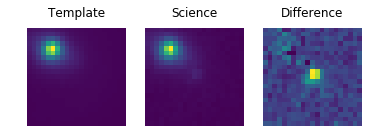

In [19]:
print_sample(reals_croped_padded_norm[1050,...])

In [21]:
np.max(reals_croped_padded_norm)

1.0

In [22]:
np.min(reals_croped_padded_norm)

0.0

# Save to pickle

In [ ]:
with open('/home/asceta/LRPpaper/datasets/ZTF/reals_normed.pkl', 'wb') as f:
    pkl.dump(reals_croped_padded_norm, f)
with open('/home/asceta/LRPpaper/datasets/ZTF/bogus_normed.pkl', 'wb') as f:
    pkl.dump(bogus_croped_padded_norm, f)

# Data summary

In [11]:
reals =json2list(data_path+'/broker_reals.json')
bogus =json2list(data_path+'/broker_bogus.json')

print('Number of reals: %d' %len(reals))
print('Number of bogus: %d' %len(bogus))

Number of reals: 7410
Number of bogus: 1980


In [12]:
print("Reals")
reals_croped_padded_norm = normalize_01(zero_fill_nans(crop_at_center(clean_misshaped(json2list(data_path+'/broker_reals.json')))))
print("\nBogus")
bogus_croped_padded_norm = normalize_01(zero_fill_nans(crop_at_center(clean_misshaped(json2list(data_path+'/broker_bogus.json')))))

Reals
118 misshaped samples removed
263 samples with NaNs

Bogus
29 misshaped samples removed
1482 samples with NaNs


In [13]:
print('Number of reals after preprocessing: %d' % reals_croped_padded_norm.shape[0])
print('Number of bogus after preprocessing: %d' % bogus_croped_padded_norm.shape[0])

Number of reals after preprocessing: 7292
Number of bogus after preprocessing: 1951
